In [ ]:
# ДЗ по линейной алгебре: зависимость цен на недвижимость от множества факторов
# Предсказание стоимости недвижимости по имеющимся данным.
import numpy as np

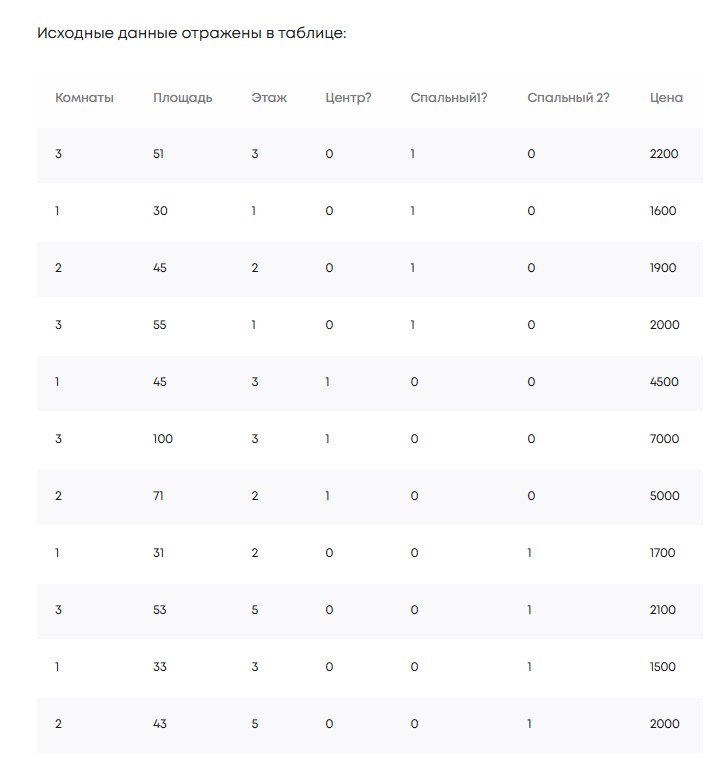

# Задание 1

In [ ]:
#multiplication_order

def multiplication_order(A, B, C):
    p, q = A.shape
    q2, r = B.shape
    r2, s = C.shape
    # Проверим согласованность размерностей
    assert q == q2, "Число столбцов A должно совпадать с числом строк B"
    assert r == r2, "Число столбцов B должно совпадать с числом строк C"

    # Вычисляем число операций для (A x B) x C
    op_ABC = p*q*r + p*r*s
    # Вычисляем число операций для A x (B x C)
    op_AbC = q*r*s + p*q*s

    if op_ABC <= op_AbC:
        return "(AxB)xC"
    else:
        return "Ax(BxC)"


# Пример проверки
A = np.random.rand(10, 20)
B = np.random.rand(20, 5)
C = np.random.rand(5, 30)
print("Оптимальный порядок:", multiplication_order(A, B, C))

Оптимальный порядок: (AxB)xC


# Задание 2


In [ ]:
# Полезность признаков

def best_worst(X, Y):
    # X: m x n, Y: m
    # Вычисляем корреляцию между каждым признаком X[:, i] и Y
    # np.corrcoef(X[:, i], Y) вернет матрицу 2x2, где off-diagonal - коэффициент корреляции

    n = X.shape[1]
    corrs = []
    for i in range(n):
        corr_matrix = np.corrcoef(X[:, i], Y)
        corr = corr_matrix[0, 1]  # Коэффициент корреляции между X[:,i] и Y
        corrs.append(corr)

    # Найдём индексы
    # Максимальная по абсолютному значению корреляция:
    max_corr_idx = np.argmax(np.abs(corrs))
    # Минимальная по абсолютному значению корреляция:
    min_corr_idx = np.argmin(np.abs(corrs))

    return max_corr_idx, min_corr_idx

# Пример данных из условия (только для проверки):
# Комнаты Площадь Этаж Центр? Спальный1? Спальный2?
X_example = np.array([
    [3, 51, 3, 0, 1, 0],
    [1, 30, 1, 0, 1, 0],
    [2, 45, 2, 0, 1, 0],
    [3, 55, 1, 0, 1, 0],
    [1, 45, 3, 1, 0, 0],
    [3,100, 3, 1, 0, 0],
    [2, 71, 2, 1, 0, 0],
    [1, 31, 2, 0, 0, 1],
    [3, 53, 5, 0, 0, 1],
    [1, 33, 3, 0, 0, 1],
    [2, 43, 5, 0, 0, 1]
])
Y_example = np.array([2200,1600,1900,2000,4500,7000,5000,1700,2100,1500,2000])

print("max_corr_idx, min_corr_idx:", best_worst(X_example, Y_example))
# Должно дать (3, 2), как указано в примере

max_corr_idx, min_corr_idx: (3, 2)


#Задание 3


In [ ]:
#Зависимость признаков

def corr_rank(X):
    # X: m x n
    # Строим корреляционную матрицу между признаками
    R = np.corrcoef(X, rowvar=False)  # rowvar=False, чтобы столбцы были признаками
    # Находим ранг матрицы корреляций
    rank = np.linalg.matrix_rank(R)
    return rank

# Пример проверки
# Для данных из примера:
print("Ранг корреляционной матрицы:", corr_rank(X_example))
# По условию, примерный результат должен быть: 5

Ранг корреляционной матрицы: 5


# Задание 4

In [ ]:
#Нахождение обратной матрицы
def inverse_matrix(A, eps=1e-15):
    # A: n x n
    det_A = np.linalg.det(A)
    if abs(det_A) < eps:
        return None
    else:
        return np.linalg.inv(A)

# Пример проверки:
A_example = np.array([[1, 2],[2, 1]])
print("Обратная матрица:")
print(inverse_matrix(A_example))



Обратная матрица:
[[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]


# Задание 5

In [ ]:
# Построение модели
# Метод OLS (от англ. Ordinary Least Squares — «метод наименьших квадратов») — это фундаментальный и один из наиболее распространённых методов
# оценки параметров линейных регрессионных моделей.
# Его суть заключается в том, чтобы подобрать такие коэффициенты линейной модели,
# При которых сумма квадратов отклонений (ошибок) предсказанных значений от фактических будет минимальной.

def fit_model(X, y):
    # X: m x n, y: m
    # Вычисляем псевдообратную матрицу
    X_pinv = np.linalg.pinv(X)
    w = X_pinv @ y
    return w

# Пример из условия:
X_example = np.array([
    [3, 51, 3, 0, 1, 0],
    [1, 30, 1, 0, 1, 0],
    [2, 45, 2, 0, 1, 0],
    [3, 55, 1, 0, 1, 0],
    [1, 45, 3, 1, 0, 0],
    [3,100, 3, 1, 0, 0],
    [2, 71, 2, 1, 0, 0],
    [1, 31, 2, 0, 0, 1],
    [3, 53, 5, 0, 0, 1],
    [1, 33, 3, 0, 0, 1],
    [2, 43, 5, 0, 0, 1]
])
Y_example = np.array([2200,1600,1900,2000,4500,7000,5000,1700,2100,1500,2000])

w = fit_model(X_example, Y_example)
print("Коэффициенты модели:", w)
# Примерный результат, указанный в условии:
# [-574.12295766   65.33255763  141.80223878 1566.16246224   12.32450391 -315.34552489]

# Мы взяли матрицу признаков X_example и вектор цен Y_example.
# Функция fit_model с помощью псевдообратной матрицы нашла вектор коэффициентов w.
# Эти коэффициенты — и есть «модель». Они позволяют, имея новые данные (новые признаки квартиры), предсказать её цену.

Коэффициенты модели: [-574.12295766   65.33255763  141.80223878 1566.16246224   12.32450391
 -315.34552489]


In [ ]:
В данном ноутбуке представлены решения всех пяти заданий:

Задание №1: Оптимальный порядок умножения матриц.
Задание №2: Поиск самого сильного и самого слабого признака по абсолютной величине корреляции с целевой переменной.
Задание №3: Определение ранга корреляционной матрицы признаков.
Задание №4: Нахождение обратной матрицы.
Задание №5: Построение линейной модели методом OLS.